# **수도권 아파트 매매 가격과 각종 경제 지표들 간의 관계를 분석하고 예측하는 모델 개발**


In [254]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 데이터 전처리

## 1.1 데이터 불러오기

In [255]:
import pandas as pd
import numpy as np

In [256]:
pd.read_excel('/content/drive/MyDrive/aix/final_project/apt_average_2.xlsx')
apt_avg = pd.read_excel('/content/drive/MyDrive/aix/final_project/apt_average_2.xlsx')

In [257]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

### 1.1.1 수도권 아파트 월별 평균 가격 데이터 (2012년 1월 ~ 2022년 3월)

In [258]:
apt_avg

,시기,아파트가격
0,2012년 01월,365249000
1,2012년 02월,364275000
2,2012년 03월,362790000
3,2012년 04월,360918000
4,2012년 05월,359253000
...,...,...
118,2021년 11월,756331000
119,2021년 12월,758448000
120,2022년 01월,758407000
121,2022년 02월,757620000


In [259]:
apt_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시기      123 non-null    object
 1   아파트가격   123 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


### 1.1.2 코스피지수, 코스닥지수 데이터(2012년 1월 ~ 2022년 3월)

In [260]:
pd.read_excel('/content/drive/MyDrive/aix/final_project/kospi_kosdaq.xlsx')
kospi_kosdaq = pd.read_excel('/content/drive/MyDrive/aix/final_project/kospi_kosdaq.xlsx')
kospi_kosdaq

,시기,코스피지수,코스닥지수
0,201201월,1955.79,513.99
1,201202월,2030.25,542.30
2,201203월,2014.04,519.56
3,201204월,1981.99,478.89
4,201205월,1843.47,471.94
...,...,...,...
118,202111월,2839.01,965.63
119,202112월,2977.65,1033.98
120,202201월,2663.34,872.87
121,202202월,2699.18,881.07


In [261]:
kospi_kosdaq=kospi_kosdaq.iloc[:,1:]

In [262]:
kospi_kosdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   코스피지수   123 non-null    float64
 1   코스닥지수   123 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


### 1.1.3 나스닥지수 데이터 (2012년 1월 ~ 2022년 3월)

In [263]:
df = pd.read_excel('/content/drive/MyDrive/aix/final_project/IXIC_2.xlsx')
df

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2012년 1월,2813.84,2657.39,2834.30,2627.23,8.79B,0.0801
1,2012년 2월,2966.89,2830.10,3000.11,2825.19,9.35B,0.0544
2,2012년 3월,3091.57,2979.11,3134.17,2900.28,9.68B,0.0420
3,2012년 4월,3046.36,3085.94,3128.25,2946.04,8.93B,-0.0146
4,2012년 5월,2827.34,3044.79,3085.40,2774.45,10.55B,-0.0719
...,...,...,...,...,...,...,...
118,2021년 11월,15537.69,15541.26,16212.23,15451.38,21.65B,0.0025
119,2021년 12월,15644.97,15752.27,15901.47,14860.04,22.79B,0.0069
120,2022년 1월,14239.88,15732.50,15852.14,13094.65,20.65B,-0.0898
121,2022년 2월,13751.40,14277.43,14509.43,12587.88,1.39B,-0.0343


In [264]:
nasdaq = df.loc[0:122, ['종가']]
nasdaq= nasdaq.rename(columns={'종가':'나스닥종가'})

In [265]:
nasdaq

,나스닥종가
0,2813.84
1,2966.89
2,3091.57
3,3046.36
4,2827.34
...,...
118,15537.69
119,15644.97
120,14239.88
121,13751.40


In [266]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나스닥종가   123 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


### 1.1.4 국고채, 회사채, 기준금리 데이터 (2012년 1월 ~ 2022년 3월)

In [267]:
pd.read_excel('/content/drive/MyDrive/aix/final_project/rate.xlsx')
rate = pd.read_excel('/content/drive/MyDrive/aix/final_project/rate.xlsx')

In [268]:
rate

,날짜,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),기준금리
0,201201월,3.37,3.50,3.80,4.24,3.25
1,201202월,3.43,3.55,3.81,4.25,3.25
2,201203월,3.55,3.69,3.95,4.36,3.25
3,201204월,3.50,3.64,3.90,4.25,3.25
4,201205월,3.38,3.49,3.75,4.01,3.25
...,...,...,...,...,...,...
118,202111월,1.95,2.17,2.36,2.49,1.00
119,202112월,1.80,1.98,2.19,2.41,1.00
120,202201월,2.06,2.28,2.49,2.63,1.25
121,202202월,2.29,2.50,2.69,2.87,1.25


In [269]:
rate = rate.iloc[:, [1,2,3,4,5]]

In [270]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   국고채 3년(평균)   123 non-null    float64
 1   국고채 5년(평균)   123 non-null    float64
 2   국고채 10년(평균)  123 non-null    float64
 3   회사채 3년(평균)   123 non-null    float64
 4   기준금리         123 non-null    float64
dtypes: float64(5)
memory usage: 4.9 KB


In [271]:
# 기간 : 2012년 1월 ~ 2022년 3월
# apt_avg : 수도권 아파트 평균매매 가격
# kospi_kosdaq : 코스피, 코스닥 지수
# nasdaq : 나스닥 지수
# rate : 국고채, 회사채, 기준금리

In [272]:
dataset = pd.concat([apt_avg, kospi_kosdaq, nasdaq, rate],axis=1)
dataset.columns = ['날짜', '평균매매가격', '코스피지수', '코스닥지수', '나스닥종가', '국고채3년평균', '국고채5년평균', '국고채10년평균', '회사채3년평균', '기준금리']
dataset

,날짜,평균매매가격,코스피지수,코스닥지수,나스닥종가,국고채3년평균,국고채5년평균,국고채10년평균,회사채3년평균,기준금리
0,2012년 01월,365249000,1955.79,513.99,2813.84,3.37,3.50,3.80,4.24,3.25
1,2012년 02월,364275000,2030.25,542.30,2966.89,3.43,3.55,3.81,4.25,3.25
2,2012년 03월,362790000,2014.04,519.56,3091.57,3.55,3.69,3.95,4.36,3.25
3,2012년 04월,360918000,1981.99,478.89,3046.36,3.50,3.64,3.90,4.25,3.25
4,2012년 05월,359253000,1843.47,471.94,2827.34,3.38,3.49,3.75,4.01,3.25
...,...,...,...,...,...,...,...,...,...,...
118,2021년 11월,756331000,2839.01,965.63,15537.69,1.95,2.17,2.36,2.49,1.00
119,2021년 12월,758448000,2977.65,1033.98,15644.97,1.80,1.98,2.19,2.41,1.00
120,2022년 01월,758407000,2663.34,872.87,14239.88,2.06,2.28,2.49,2.63,1.25
121,2022년 02월,757620000,2699.18,881.07,13751.40,2.29,2.50,2.69,2.87,1.25


In [273]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        123 non-null    object 
 1   평균매매가격    123 non-null    int64  
 2   코스피지수     123 non-null    float64
 3   코스닥지수     123 non-null    float64
 4   나스닥종가     123 non-null    float64
 5   국고채3년평균   123 non-null    float64
 6   국고채5년평균   123 non-null    float64
 7   국고채10년평균  123 non-null    float64
 8   회사채3년평균   123 non-null    float64
 9   기준금리      123 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.7+ KB


In [274]:
# 결측치 확인

dataset.isnull().sum()

날짜          0
평균매매가격      0
코스피지수       0
코스닥지수       0
나스닥종가       0
국고채3년평균     0
국고채5년평균     0
국고채10년평균    0
회사채3년평균     0
기준금리        0
dtype: int64

## 1.2 탐색적 데이터분석

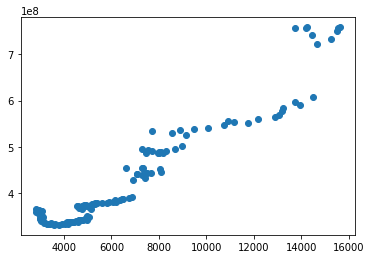

In [275]:
plt.scatter(dataset[['나스닥종가']], dataset[['평균매매가격']])
plt.show()

In [276]:
import matplotlib.pyplot as plt

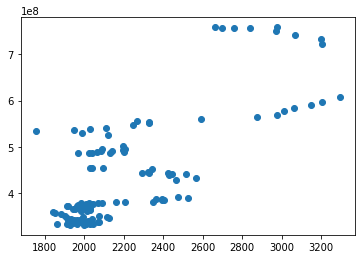

In [277]:
plt.scatter(dataset[['코스피지수']], dataset[['평균매매가격']])
plt.show()

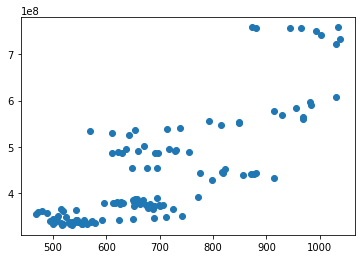

In [278]:
plt.scatter(dataset[['코스닥지수']], dataset[['평균매매가격']])
plt.show()

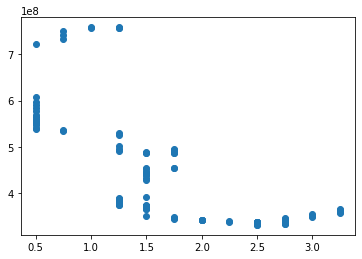

In [279]:
plt.scatter(dataset[['기준금리']], dataset[['평균매매가격']])
plt.show()

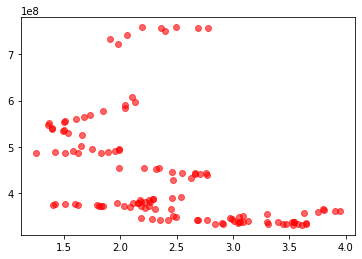

In [280]:
plt.scatter(dataset[['국고채10년평균']], dataset[['평균매매가격']], c='r',alpha=0.6)
plt.show()

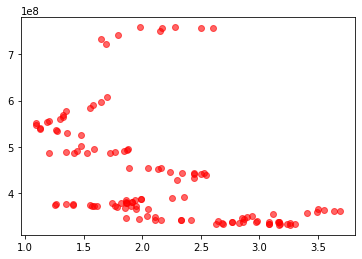

In [281]:
plt.scatter(dataset[['국고채5년평균']], dataset[['평균매매가격']], c='r',alpha=0.6)
plt.show()

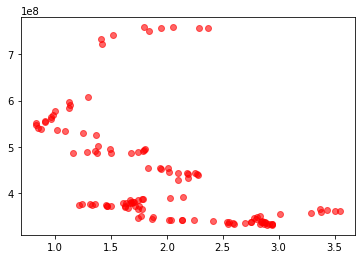

In [282]:
plt.scatter(dataset[['국고채3년평균']], dataset[['평균매매가격']], c='r',alpha=0.6)
plt.show()

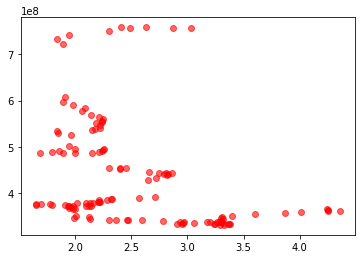

In [283]:
plt.scatter(dataset[['회사채3년평균']], dataset[['평균매매가격']], c='r',alpha=0.6)
plt.show()


## 1.3 데이터 표준화

* 변수들은 범위가 크게 다르다. 범위가 다른 데이터셋으로 신경망을 훈력시키면 범위가 큰 변수가 더 강하게 작용해 신경망이 이 변수에 더 중심을 두게 된다. 

* 따라서, 데이터 표준화(데이터셋의 각 숫자 변수를 평균이 0, 분산이 1이 되도록 변환하는 데이터 전처리 과정)을 거치는 것이 필요하다.

* 사이킷런의 preprocessing 클래스를 사용해 수행한다.

In [284]:
dataset.drop(columns=['날짜','국고채3년평균','국고채5년평균','국고채10년평균','회사채3년평균'],axis=1)

,평균매매가격,코스피지수,코스닥지수,나스닥종가,기준금리
0,365249000,1955.79,513.99,2813.84,3.25
1,364275000,2030.25,542.30,2966.89,3.25
2,362790000,2014.04,519.56,3091.57,3.25
3,360918000,1981.99,478.89,3046.36,3.25
4,359253000,1843.47,471.94,2827.34,3.25
...,...,...,...,...,...
118,756331000,2839.01,965.63,15537.69,1.00
119,758448000,2977.65,1033.98,15644.97,1.00
120,758407000,2663.34,872.87,14239.88,1.25
121,757620000,2699.18,881.07,13751.40,1.25


In [285]:
# sklearn.preprocessing을 임포트
from sklearn import preprocessing

In [286]:
# preprocessing.scale() 메소드를 이용하여 dataset를 표준화한다.
dataset_scaled = dataset.drop(columns=['날짜','국고채3년평균','국고채5년평균','국고채10년평균','회사채3년평균'],axis=1)
dataset_scaled = preprocessing.scale(dataset_scaled)
dataset_scaled

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


array([[-6.22192762e-01, -7.17051309e-01, -1.15390682e+00,
        -1.16694376e+00,  2.09604187e+00],
       [-6.30559135e-01, -5.06471826e-01, -9.66682555e-01,
        -1.12336213e+00,  2.09604187e+00],
       [-6.43314848e-01, -5.52315144e-01, -1.11707039e+00,
        -1.08785897e+00,  2.09604187e+00],
       [-6.59394778e-01, -6.42955386e-01, -1.38603580e+00,
        -1.10073271e+00,  2.09604187e+00],
       [-6.73696638e-01, -1.03470223e+00, -1.43199866e+00,
        -1.16309958e+00,  2.09604187e+00],
       [-6.95308338e-01, -1.00489418e+00, -1.31811658e+00,
        -1.13242870e+00,  2.09604187e+00],
       [-7.16980166e-01, -9.25764254e-01, -1.46063451e+00,
        -1.13115585e+00,  1.76677859e+00],
       [-7.44673378e-01, -8.60350563e-01, -1.19120617e+00,
        -1.09486677e+00,  1.76677859e+00],
       [-7.68861990e-01, -6.02739965e-01, -1.08916201e+00,
        -1.08083693e+00,  1.76677859e+00],
       [-7.90413562e-01, -8.40723628e-01, -1.19147071e+00,
        -1.12041777e+00

In [287]:
c=['평균매매가격', '코스피지수', '코스닥지수', '나스닥종가', '기준금리']

In [288]:
# preprocessing.scale() 메소드는 판다스의 DataFrame이 아닌 다른 객체를 반환하므로 결과를 다시 DataFrame객체로 변환하고,
# df에 담는다.

dataset_scaled = pd.DataFrame(dataset_scaled,columns=c)
df = dataset_scaled
df

,평균매매가격,코스피지수,코스닥지수,나스닥종가,기준금리
0,-0.622193,-0.717051,-1.153907,-1.166944,2.096042
1,-0.630559,-0.506472,-0.966683,-1.123362,2.096042
2,-0.643315,-0.552315,-1.117070,-1.087859,2.096042
3,-0.659395,-0.642955,-1.386036,-1.100733,2.096042
4,-0.673697,-1.034702,-1.431999,-1.163100,2.096042
...,...,...,...,...,...
118,2.737087,1.780773,1.832952,2.456226,-0.867328
119,2.755271,2.172859,2.284975,2.486775,-0.867328
120,2.754919,1.283963,1.219496,2.086670,-0.538064
121,2.748159,1.385322,1.273726,1.947573,-0.538064


In [289]:
# 데이터 표준화를 한 결과, 데이터의 평균은 0, 분산은 1로 변경된 것을 확인할 수 있다.
df.describe().round()


,평균매매가격,코스피지수,코스닥지수,나스닥종가,기준금리
count,123.0,123.0,123.0,123.0,123.0
mean,0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,-1.0,-1.0,-1.0,-1.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-1.0,-0.0,-0.0,-0.0,-0.0
75%,0.0,0.0,1.0,0.0,1.0
max,3.0,3.0,2.0,2.0,2.0


In [290]:
# 그런데, 평균매매가격은 표준화할 필요가 없기 때문에, 기존 데이터로 바꿔주도록 한다. 
# 단, 금액이 크기 때문에, 100000000을 나눠주어, 단위를 원단위에서 1억으로 변경시킨다.

df['평균매매가격']=dataset['평균매매가격']/100000000
df

,평균매매가격,코스피지수,코스닥지수,나스닥종가,기준금리
0,3.65249,-0.717051,-1.153907,-1.166944,2.096042
1,3.64275,-0.506472,-0.966683,-1.123362,2.096042
2,3.62790,-0.552315,-1.117070,-1.087859,2.096042
3,3.60918,-0.642955,-1.386036,-1.100733,2.096042
4,3.59253,-1.034702,-1.431999,-1.163100,2.096042
...,...,...,...,...,...
118,7.56331,1.780773,1.832952,2.456226,-0.867328
119,7.58448,2.172859,2.284975,2.486775,-0.867328
120,7.58407,1.283963,1.219496,2.086670,-0.538064
121,7.57620,1.385322,1.273726,1.947573,-0.538064


In [291]:
df.describe().round()

,평균매매가격,코스피지수,코스닥지수,나스닥종가,기준금리
count,123.0,123.0,123.0,123.0,123.0
mean,4.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,3.0,-1.0,-1.0,-1.0,-2.0
25%,3.0,-1.0,-1.0,-1.0,-1.0
50%,4.0,-0.0,-0.0,-0.0,-0.0
75%,5.0,0.0,1.0,0.0,1.0
max,8.0,3.0,2.0,2.0,2.0


In [292]:
# 데이터의 타입이 모델에 사용가능한 실수형임을 확인하였다.  
df.dtypes

평균매매가격    float64
코스피지수     float64
코스닥지수     float64
나스닥종가     float64
기준금리      float64
dtype: object

## 1.4 데이터셋 분할

데이터 전처리의 마지막 단계로 데이터셋을 두가지 데이터셋(훈련 데이터셋과 테스트 데이터셋)으로 나눈다.


- 훈련 데이터셋(training set) : 모델을 학습시킬 때 사용되는 데이터셋

- 테스트 데이터셋(testing set) : 학습된 모델을 평가하는 데 사용되는 데이터셋



In [293]:
from sklearn.model_selection import train_test_split

In [294]:
# 특징(독립)변수를 X에 대입
# 목표(종속)변수를 Y에 대입

X = df[['나스닥종가', '코스피지수', '코스닥지수', '기준금리']]
Y = df[['평균매매가격']]

In [295]:
# 데이터셋 df를 훈련 데이터셋과 테스트 데이터셋으로 분할하기

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

# 2. 분석하기

In [296]:
# 한글폰드 오류해결
plt.rc('font', family='NanumBarunGothic')

# x,y축에 -부호 오류 해결
plt.rc('axes', unicode_minus=False)

## **2.1 머신러닝 - 신경망**

### 2.1.1 모델구조 만들기

In [297]:
# 필요한 라이브러리(모듈) 임포트

from keras.models import Sequential
from keras.layers import Dense

In [298]:
# 레이어를 나란이 연결하기 위해 케라스의 Sequential 모델을 만듦
# model에 대입

model = Sequential()

In [299]:
# 특징(독립)변수가 4개, 노드가 60개, 활성화함수='relu'를 설정하여 하나의 Danse레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(60,input_dim=4, activation='relu'))

In [300]:
# 노드가 60개, 활성화함수='relu'를 설정하여 하나의 Danse레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(60, activation='relu'))

In [301]:
# 만든 레이어를 model에 추가함

model.add(Dense(1))

In [302]:
# 모델 컴파일
# 위에서 만든 모델이 효과적으로 구현될 수 있게 여러가지 옵션을 설정해서 컴파일함
# 손실함수를 'mean_squared_error'로
# 옵티마이저를 'rmsprop'으로 설정하여 모델을 컴파일 함

model.compile(loss='mse', optimizer='rmsprop')

In [303]:
# 모델 컴파일
# 위에서 만든 모델이 효과적으로 구현될 수 있게 여러가지 옵션을 설정해서 컴파일함
# 손실함수를 'mean_squared_error'로
# 옵티마이저를 'adam'으로 설정하여 모델을 컴파일 함

model.compile(loss='mse', optimizer='adam')

### **2.1.2 모델 학습시키기**

In [321]:
model.fit(X_train, Y_train, epochs=500, verbose=0)

### **2.1.3 모델 평가하기**

In [322]:
# 훈련 데이터셋을 이용해 model을 평가하기

model.evaluate(X_train,Y_train)

4/4 [==============================] - 0s 4ms/step - loss: 0.0089


0.0088622085750103

In [323]:
# 테스트 데이터셋을 이용해 model을 평가하기

model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.0289


0.028940634801983833

In [324]:
import matplotlib.pyplot as plt

In [325]:
Y_predicted = model.predict(X_test)

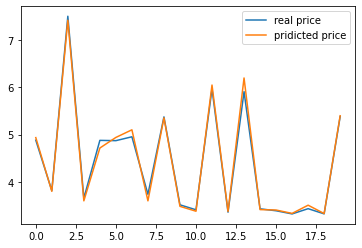

In [326]:
number_of_samples=20
plt.plot(range(number_of_samples),Y_test[:number_of_samples], label='real price')
plt.plot(range(number_of_samples),Y_predicted[:number_of_samples], label='pridicted price')
plt.legend()
plt.show()

## 2.2  회귀모델 (LinearRegression)

In [310]:
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [311]:
model_L=LinearRegression()

### 2.2.1 모델 구조만들기 & 학습시키기

In [312]:
model_L.fit(X_train, Y_train)

LinearRegression()

### 2.2.2 모델 평가하기

In [313]:
train_price=model_L.score(X_train,Y_train)
test_price=model_L.score(X_test,Y_test)

In [314]:
Y_predicted_L = model_L.predict(X_test)

In [315]:
print(model_L.coef_,model_L.intercept_)

[[ 1.63761648 -0.37646329  0.08125925  0.35557098]] [4.3846921]


In [316]:
mse = mean_squared_error(Y_test, Y_predicted_L)
rmse = np.sqrt(mse)
print('\nMSE : {0:.3f}, RMSE : {1:.3F}\n'.format(mse, rmse))
print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(Y_test, Y_predicted_L)))

#r2_score 설명력


MSE : 0.061, RMSE : 0.247


r2 Variance score  0.958



In [317]:
import matplotlib.pyplot as plt

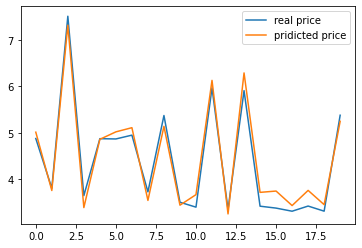

In [318]:
number_of_samples=20
plt.plot(range(number_of_samples),Y_test[:number_of_samples], label='real price')
plt.plot(range(number_of_samples),Y_predicted_L[:number_of_samples], label='pridicted price')
plt.legend()
plt.show()